In [1]:
from bs4 import BeautifulSoup
from gensim import corpora
from pprint import pprint 
from collections import defaultdict
import glob 


#Array storage for Award IDs and Abstracts 
awardabs_ar=[]
aID_ar=[]
doct_div2 = []
doc_div = []
    
for items in glob.glob("201*/*.xml"): #Iterate through all xml files in the directory/file name given
    
    #Open files
    item = open(items)
    
    #Store Data
    xml = item.read()
    
    #Convert data to text 
    soup = BeautifulSoup(xml,'xml')
    
    #store the current name of the institution 
    clemson = soup.Name.string
    
    #Check if the name matches Clemson University 
    #if clemson=="Clemson University":
    #Add award ID 
    ID = soup.AwardID.string
    aID_ar.append(ID)
    
    #filter data if not None Type, Error checking  
    if soup.AbstractNarration.string is not None:     
        abst = soup.AbstractNarration.string
        #Adds abstracts to its list 
        awardabs_ar.append(abst)
        
    #Determine the number of topics if not None Type, error checking 
    if soup.Directorate.LongName.string is not None:
        doct = soup.Directorate.LongName.string
    if soup.Division.LongName.string is not None:
        div = soup.Division.LongName.string
    #concatenate Directorate and Divison names for testing 
    test = doct + "\t" + div
        
    #All Directorates and Divisions stored 
    doc_div.append(test)
        
    #No duplicate Directorate and Division combinations 
    if test not in doct_div2:
        doct_div2.append(test)

topic = len(doct_div2)
print("\nNumber of Topics:", topic)

#All Abstracts 
file=open("cu_tigers.txt","w")    
for lines in awardabs_ar:
    file.write(lines)
    file.write('\n')
file.close()

#All Xml Award IDs 
file2=open("cu_IDs.txt","w")    
for lines in aID_ar:
    file2.write(lines)
    file2.write('\n')
file2.close()

#No Dublicate Directorates and Division Combos 
file3=open("cu_doc_div2.txt","w")    
for lines in doct_div2:
    file3.write(lines)
    file3.write('\n')
file3.close()

#All Directorates and Divisions 
file4=open("cu_doc_div.txt","w")    
for lines in doc_div:
    file4.write(lines)
    file4.write('\n')
file4.close()

print("done")


Number of Topics: 55
done


[]


<function matplotlib.pyplot.show>

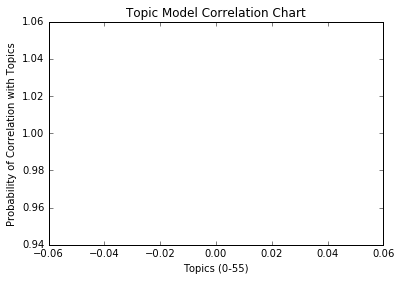

In [51]:
from bs4 import BeautifulSoup #import module 
from gensim import corpora, models, similarities
import gensim 
import matplotlib.pyplot as plt

%matplotlib inline

file = open("2015/1500004.xml") #open xml file 

xml = file.read() #read file 

soup = BeautifulSoup(xml,'xml') #convert to text 

dictionary = [soup.AbstractNarration.string]

#removed word list    
read_words = open('stopwords.txt', 'r')
r_words = read_words.readline()

stoplist = set(r_words.split())

#remove stop words
texts = [[word for word in doc.lower().split() if word not in stoplist] for doc in dictionary]


# turns our tokenized documents into a id <-> term dictionary
dicti = corpora.Dictionary(texts)

doc1 = ["random words to check code against words fun hey you there bag good"]

words = dicti.doc2bow(doc1[0].lower().split())

print(words)

#convert tokenized documents into a document-term matrix
corpus = [dicti.doc2bow(text) for text in texts]


#generate LDA model
ldamodel = gensim.models.ldamodel.LdaModel(corpus, num_topics=1, id2word=dicti,passes=20)


plt.plot([x[0] for x in vec],[x[1] for x in vec])
plt.xlabel('Topics (0-55)')
plt.ylabel('Probability of Correlation with Topics')
plt.title('Topic Model Correlation Chart')

plt.show



In [20]:
words = "Hey there man nice shot"
words1 = []

words2 = set(words.lower().split())

items = ["hey","man"]

for lines in words2:
    for item in items:
        lines = lines.replace(item,'')
    words1.append(lines)

words3 = ' '.join(str(w) for w in words1)
print(words3)

shot  nice there 
